In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("hypothyroid.csv")

In [3]:
df.shape

(3772, 30)

In [4]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
df.columns


Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [7]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on_thyroxine,3772,2,f,3308
query_on_thyroxine,3772,2,f,3722
on_antithyroid_medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid_surgery,3772,2,f,3719
I131_treatment,3772,2,f,3713
query_hypothyroid,3772,2,f,3538


In [8]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, df[column][df[column]=='?'].count())
    

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


In [9]:
df.Class.unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [10]:
counting = df.Class.value_counts()
counting

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

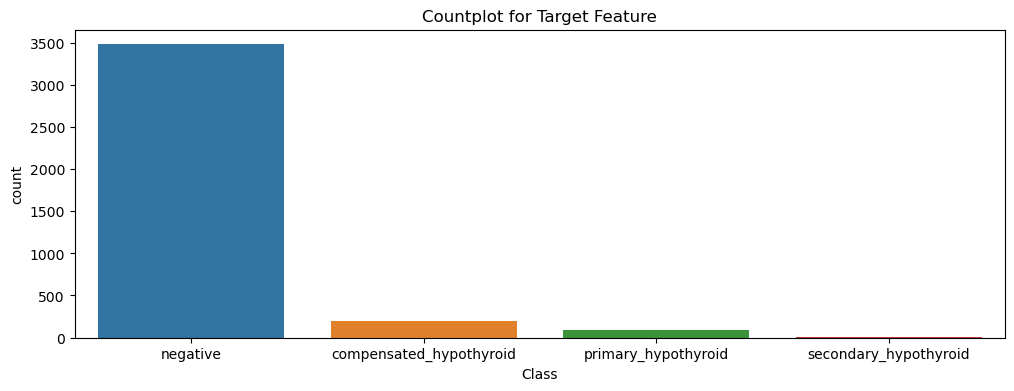

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(x='Class',data=df)
plt.title("Countplot for Target Feature");


In [12]:
df.replace('?',np.nan,inplace=True)

In [13]:
df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

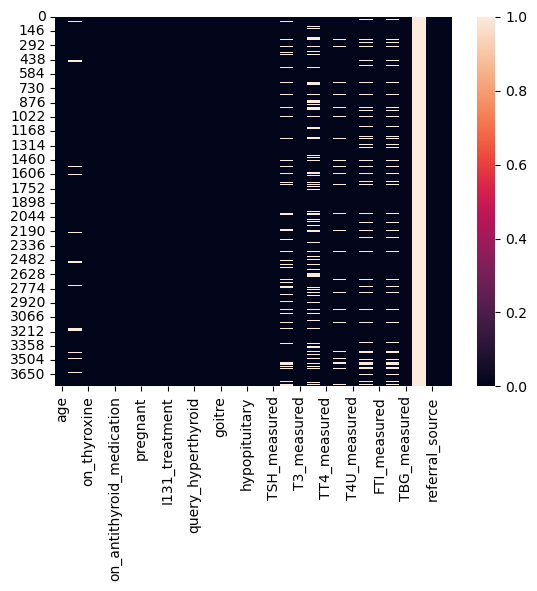

In [14]:
sns.heatmap(df.isnull());

In [15]:
df.drop(columns='TBG',inplace = True)

In [16]:
df[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,NaN
2,t,0.91
3,f,NaN
4,t,0.87
...,...,...
3767,f,NaN
3768,t,1.08
3769,t,1.07
3770,t,0.94


In [17]:
df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1,inplace=True)

In [18]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

In [19]:
df.age = pd.to_numeric(df.age)
df.TT4 = pd.to_numeric(df.TT4)
df.FTI = pd.to_numeric(df.FTI)
df.T4U = pd.to_numeric(df.T4U)
df.TSH = pd.to_numeric(df.TSH)
df.T3 = pd.to_numeric(df.T3)

In [20]:
df.age.dtype

dtype('float64')

In [21]:
null_var = df.isnull().sum()
null_var = null_var[null_var > 0].keys()
null_var

Index(['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [22]:
numeric_df = df.select_dtypes(include=['int64','float64'])
numeric_df

,age,TSH,T3,TT4,T4U,FTI
0,41.0,1.30,2.5,125.0,1.14,109.0
1,23.0,4.10,2.0,102.0,NaN,NaN
2,46.0,0.98,NaN,109.0,0.91,120.0
3,70.0,0.16,1.9,175.0,NaN,NaN
4,70.0,0.72,1.2,61.0,0.87,70.0
...,...,...,...,...,...,...
3767,30.0,NaN,NaN,NaN,NaN,NaN
3768,68.0,1.00,2.1,124.0,1.08,114.0
3769,74.0,5.10,1.8,112.0,1.07,105.0
3770,72.0,0.70,2.0,82.0,0.94,87.0


In [23]:
missing_num_var =[var for var in numeric_df.columns if numeric_df[var].isnull().sum()>0]
missing_num_var

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

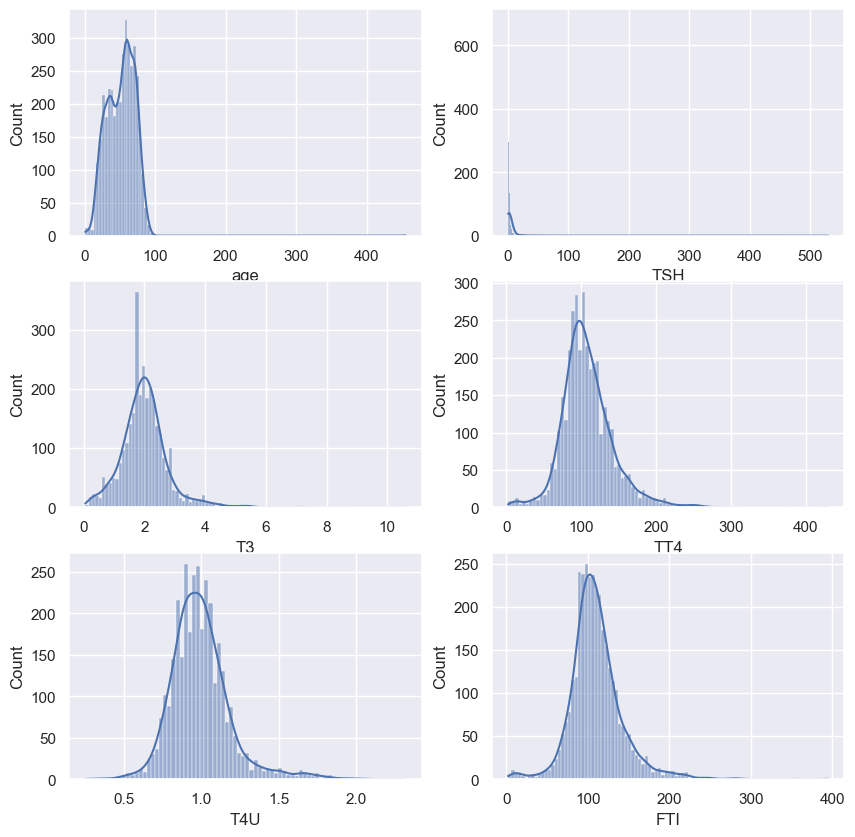

In [24]:
plt.figure(figsize=(10,10),facecolor='white')
sns.set();
for i,var in enumerate(missing_num_var):
    plt.subplot(3,2,i+1);
    sns.histplot(df[var],kde=True);
   

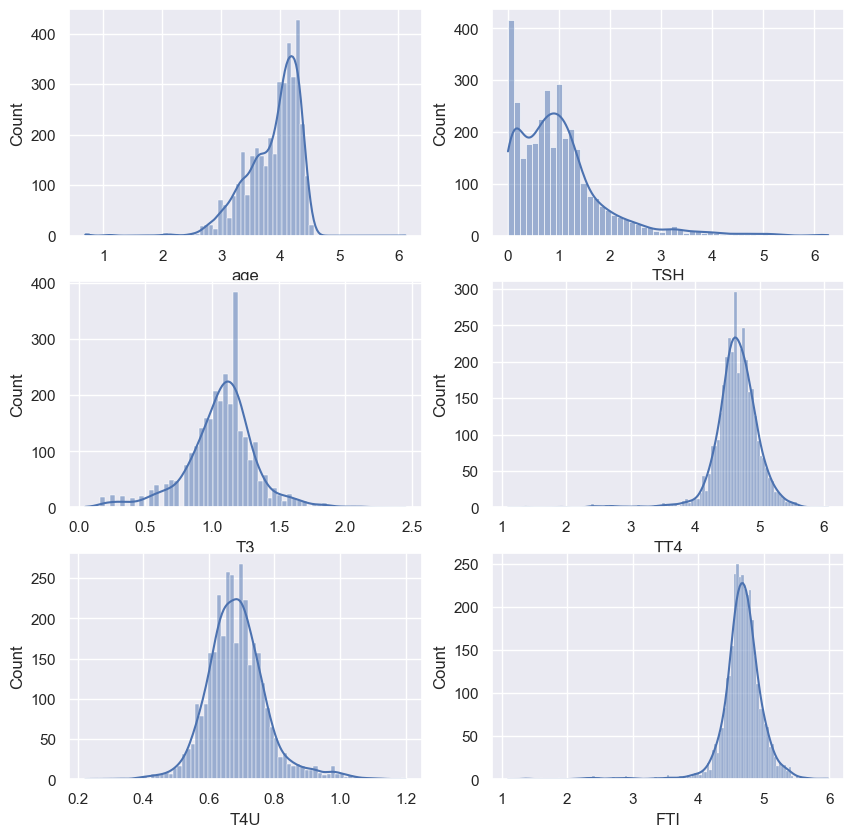

In [25]:
plt.figure(figsize=(10,10),facecolor='white')
sns.set();
for i,var in enumerate(missing_num_var):
    df[var] += 1
    plt.subplot(3,2,i+1);
    sns.histplot(np.log(df[var]),kde=True);
   

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-p

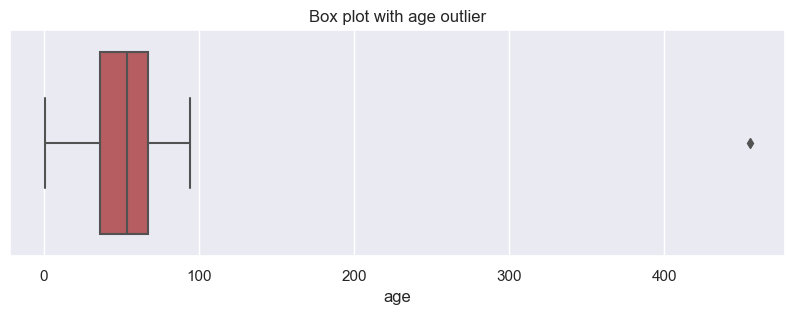

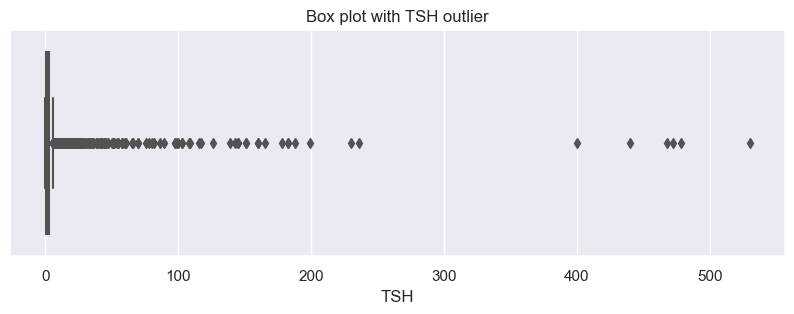

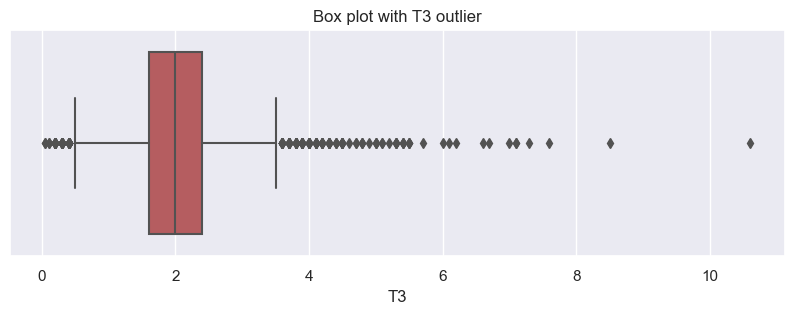

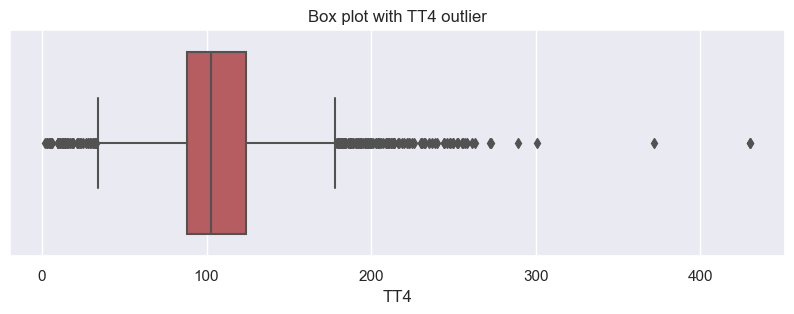

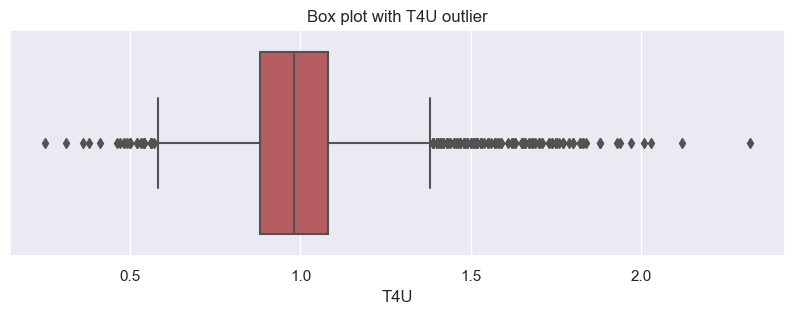

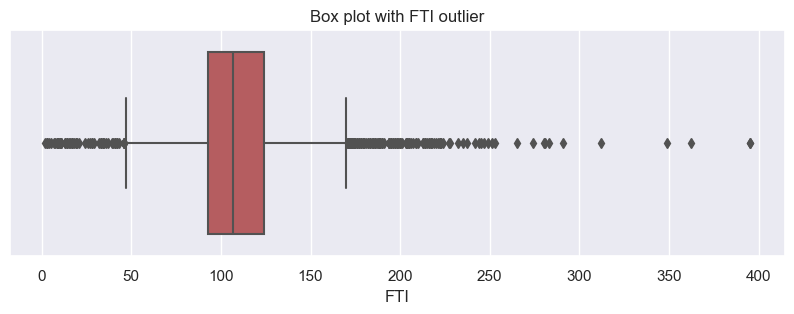

In [26]:
for i,var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(numeric_df[var],color ='r')
    plt.title(f'Box plot with {var} outlier')
 
 

In [27]:
df.drop(columns='TSH',inplace=True)

In [28]:
numeric_df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


In [29]:
irq_age = numeric_df.age.quantile(0.75) - numeric_df.age.quantile(0.25)
lower_bridge = numeric_df['age'].quantile(0.25) -(irq_age*1.5)
upper_bridge = numeric_df['age'].quantile(0.75) + (irq_age*1.5)
print(lower_bridge),print(upper_bridge)

-10.5
113.5


(None, None)

In [30]:
df.loc[df.age >= 113,'age'] = 113

In [31]:
numeric_mean=numeric_df.fillna(numeric_df.mean())
numeric_median=numeric_df.fillna(numeric_df.median())

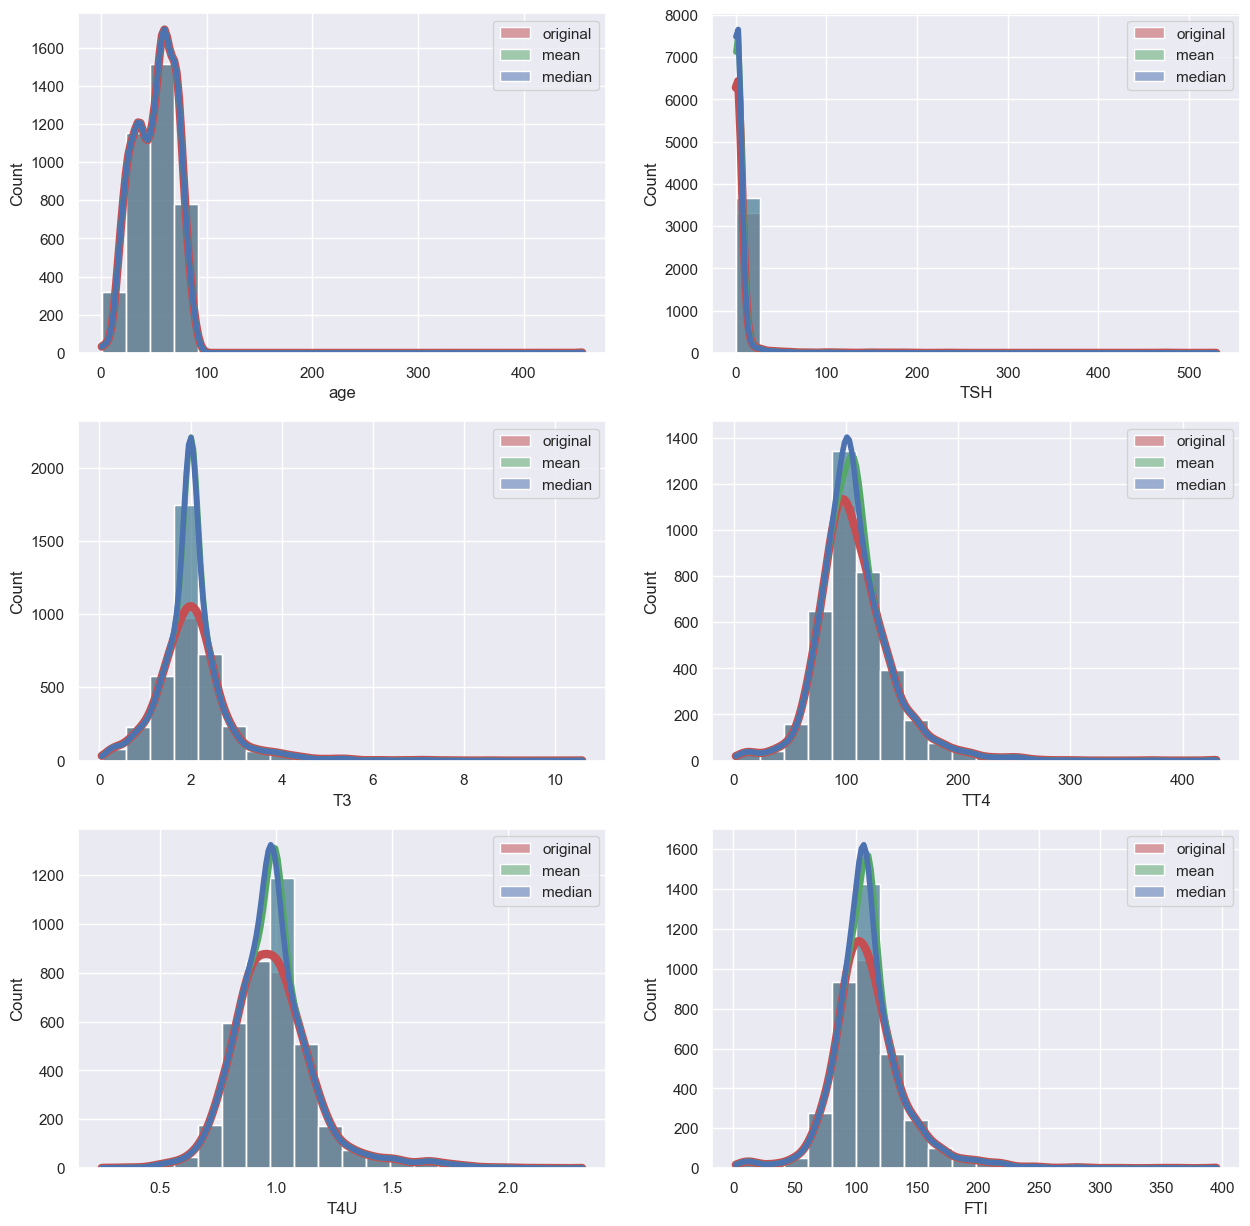

In [32]:
plt.figure(figsize=(15,15))
sns.set();
for i,var in enumerate(missing_num_var):
    plt.subplot(3,2,i+1);
    sns.histplot(numeric_df[var],bins=20,kde=True,label="original",color='r',line_kws={'linewidth':6})
    sns.histplot(numeric_mean[var],bins=20,kde=True,label="mean",color = 'g',line_kws={'linewidth':4})
    sns.histplot(numeric_median[var],bins=20,kde=True,color='b',label="median",line_kws={'linewidth':4})
    plt.legend()

In [33]:
columns = ['age','T3','TT4','T4U','FTI']
for i in columns:
    df[i].fillna(df[i].mean(),inplace = True)

In [34]:
df.select_dtypes(include=['int64','float64']).isnull().sum()

age    0
T3     0
TT4    0
T4U    0
FTI    0
dtype: int64

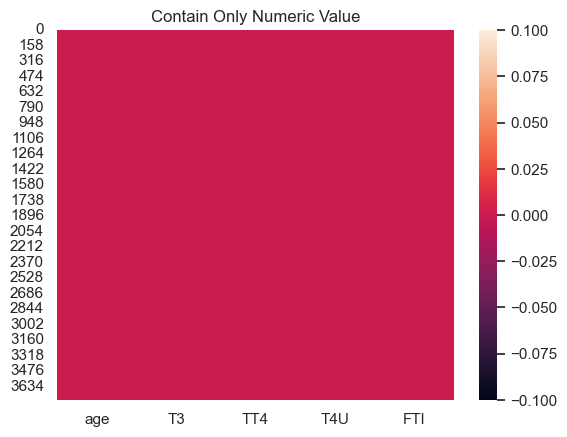

In [35]:
sns.heatmap(df.select_dtypes(include=['int64','float64']).isnull());
plt.title('Contain Only Numeric Value');

In [36]:
cat_vars=df.select_dtypes(include='object')
cat_vars.head()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,referral_source,Class
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,SVHC,negative
1,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other,negative
2,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other,negative
3,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,other,negative
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,SVI,negative


In [37]:
cat_vars.isnull().sum()

sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
referral_source                0
Class                          0
dtype: int64

<AxesSubplot:>

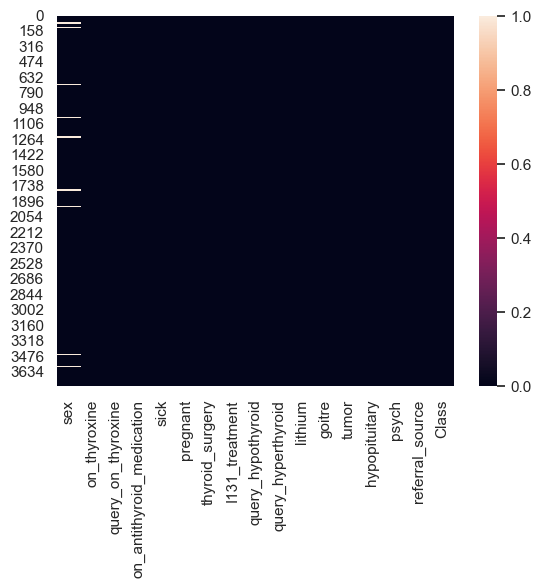

In [38]:
sns.heatmap(cat_vars.isnull())


In [39]:
cat_vars[cat_vars['pregnant'] =='f'][['sex','pregnant']].isnull().sum()

sex         148
pregnant      0
dtype: int64

In [40]:
df[(df.age >= 45) & (df.pregnant == 't')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source,Class
1609,74.0,NaN,f,f,f,f,t,f,f,f,...,f,f,f,f,3.5,111.0,2.28,86.0,other,negative
2223,76.0,F,f,f,f,f,t,f,f,f,...,f,f,f,f,3.9,140.0,2.53,92.0,other,negative


In [41]:
df[(df.age >= 45) & (df.pregnant == 't')][['pregnant']]

,pregnant
1609,t
2223,t


In [42]:
df[(df.pregnant == 't') & (df.sex.isnull())]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source,Class
1609,74.0,NaN,f,f,f,f,t,f,f,f,...,f,f,f,f,3.5,111.0,2.28,86.0,other,negative
3271,22.0,NaN,f,f,f,f,t,f,f,f,...,f,t,f,f,4.5,172.0,2.49,116.0,STMW,negative


In [43]:
df.loc[(df.age >= 45) & (df.pregnant == 't'),'pregnant'] = 'f'

In [44]:
df.loc[(df.sex.isnull()) & (df.pregnant == 't'),'sex'] = 'F'

In [45]:
df[(df.pregnant == 't') & (df.sex.isnull())]['sex'].isnull().sum()

0

In [46]:
df.sex.value_counts()

F    2481
M    1142
Name: sex, dtype: int64

In [47]:
df_bfill = df.fillna(method = 'bfill')
df_ffill = df.fillna(method= 'ffill')

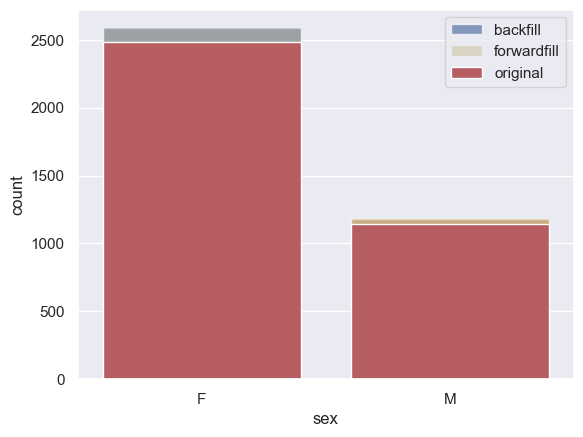

In [48]:
sns.countplot(x='sex',data=df_bfill,label= 'backfill',alpha = 0.7);
sns.countplot(x='sex',data=df_ffill,label= 'forwardfill',color = 'y',alpha = 0.4);
sns.countplot(x='sex',data=df, color = 'r',label = 'original');
plt.legend();

In [49]:
df['sex'].fillna(method = 'ffill',inplace = True )

In [50]:
df['sex'].isnull().sum()

0

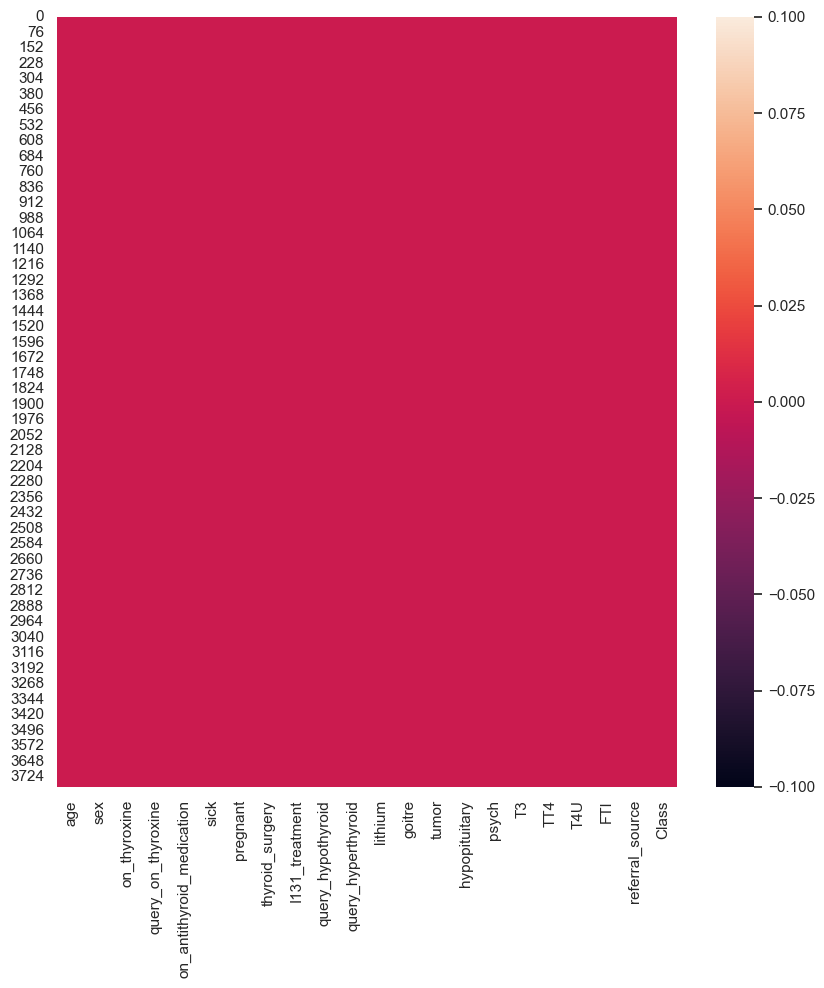

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull());

In [52]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source,Class
0,42.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,3.5000,126.000000,2.140,110.000000,SVHC,negative
1,24.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,3.0000,103.000000,1.995,111.469649,other,negative
2,47.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,3.0135,110.000000,1.910,121.000000,other,negative
3,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,2.9000,176.000000,1.995,111.469649,other,negative
4,71.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,2.2000,62.000000,1.870,71.000000,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,31.0,F,f,f,f,f,f,f,f,f,...,f,t,f,f,3.0135,109.319345,1.995,111.469649,other,negative
3768,69.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,3.1000,125.000000,2.080,115.000000,SVI,negative
3769,75.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,2.8000,113.000000,2.070,106.000000,other,negative
3770,73.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,3.0000,83.000000,1.940,88.000000,SVI,negative


In [53]:
df.replace(['t','f'],[1,0],inplace = True)

In [54]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source,Class
0,42.0,F,0,0,0,0,0,0,0,0,...,0,0,0,0,3.5000,126.000000,2.140,110.000000,SVHC,negative
1,24.0,F,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0000,103.000000,1.995,111.469649,other,negative
2,47.0,M,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0135,110.000000,1.910,121.000000,other,negative
3,71.0,F,1,0,0,0,0,0,0,0,...,0,0,0,0,2.9000,176.000000,1.995,111.469649,other,negative
4,71.0,F,0,0,0,0,0,0,0,0,...,0,0,0,0,2.2000,62.000000,1.870,71.000000,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,31.0,F,0,0,0,0,0,0,0,0,...,0,1,0,0,3.0135,109.319345,1.995,111.469649,other,negative
3768,69.0,F,0,0,0,0,0,0,0,0,...,0,0,0,0,3.1000,125.000000,2.080,115.000000,SVI,negative
3769,75.0,F,0,0,0,0,0,0,0,0,...,0,0,0,0,2.8000,113.000000,2.070,106.000000,other,negative
3770,73.0,M,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0000,83.000000,1.940,88.000000,SVI,negative


In [55]:
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

In [56]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source,Class
0,42.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.5000,126.000000,2.140,110.000000,SVHC,negative
1,24.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0000,103.000000,1.995,111.469649,other,negative
2,47.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0135,110.000000,1.910,121.000000,other,negative
3,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2.9000,176.000000,1.995,111.469649,other,negative
4,71.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.2000,62.000000,1.870,71.000000,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,31.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,3.0135,109.319345,1.995,111.469649,other,negative
3768,69.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.1000,125.000000,2.080,115.000000,SVI,negative
3769,75.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.8000,113.000000,2.070,106.000000,other,negative
3770,73.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0000,83.000000,1.940,88.000000,SVI,negative


In [57]:
df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [58]:
df = pd.get_dummies(df, columns=['referral_source'])

In [59]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0,0,0,0,0,0,0,0,0,...,3.5000,126.000000,2.140,110.000000,negative,0,1,0,0,0
1,24.0,0,0,0,0,0,0,0,0,0,...,3.0000,103.000000,1.995,111.469649,negative,0,0,0,0,1
2,47.0,1,0,0,0,0,0,0,0,0,...,3.0135,110.000000,1.910,121.000000,negative,0,0,0,0,1
3,71.0,0,1,0,0,0,0,0,0,0,...,2.9000,176.000000,1.995,111.469649,negative,0,0,0,0,1
4,71.0,0,0,0,0,0,0,0,0,0,...,2.2000,62.000000,1.870,71.000000,negative,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,31.0,0,0,0,0,0,0,0,0,0,...,3.0135,109.319345,1.995,111.469649,negative,0,0,0,0,1
3768,69.0,0,0,0,0,0,0,0,0,0,...,3.1000,125.000000,2.080,115.000000,negative,0,0,0,1,0
3769,75.0,0,0,0,0,0,0,0,0,0,...,2.8000,113.000000,2.070,106.000000,negative,0,0,0,0,1
3770,73.0,1,0,0,0,0,0,0,0,0,...,3.0000,83.000000,1.940,88.000000,negative,0,0,0,1,0


In [60]:
encoder = LabelEncoder()

df['Class'] =encoder.fit_transform(df['Class'])

In [61]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0,0,0,0,0,0,0,0,0,...,3.5000,126.0,2.140,110.000000,1,0,1,0,0,0
1,24.0,0,0,0,0,0,0,0,0,0,...,3.0000,103.0,1.995,111.469649,1,0,0,0,0,1
2,47.0,1,0,0,0,0,0,0,0,0,...,3.0135,110.0,1.910,121.000000,1,0,0,0,0,1
3,71.0,0,1,0,0,0,0,0,0,0,...,2.9000,176.0,1.995,111.469649,1,0,0,0,0,1
4,71.0,0,0,0,0,0,0,0,0,0,...,2.2000,62.0,1.870,71.000000,1,0,0,0,1,0


In [62]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,3772.0,52.644922,19.003395,2.00,37.00,55.0000,68.00,113.00
sex,3772.0,0.314687,0.464453,0.00,0.00,0.0000,1.00,1.00
on_thyroxine,3772.0,0.123012,0.328494,0.00,0.00,0.0000,0.00,1.00
query_on_thyroxine,3772.0,0.013256,0.114382,0.00,0.00,0.0000,0.00,1.00
on_antithyroid_medication,3772.0,0.011400,0.106174,0.00,0.00,0.0000,0.00,1.00
sick,3772.0,0.038971,0.193552,0.00,0.00,0.0000,0.00,1.00
pregnant,3772.0,0.013521,0.115505,0.00,0.00,0.0000,0.00,1.00
thyroid_surgery,3772.0,0.014051,0.117716,0.00,0.00,0.0000,0.00,1.00
I131_treatment,3772.0,0.015642,0.124101,0.00,0.00,0.0000,0.00,1.00
query_hypothyroid,3772.0,0.062036,0.241253,0.00,0.00,0.0000,0.00,1.00


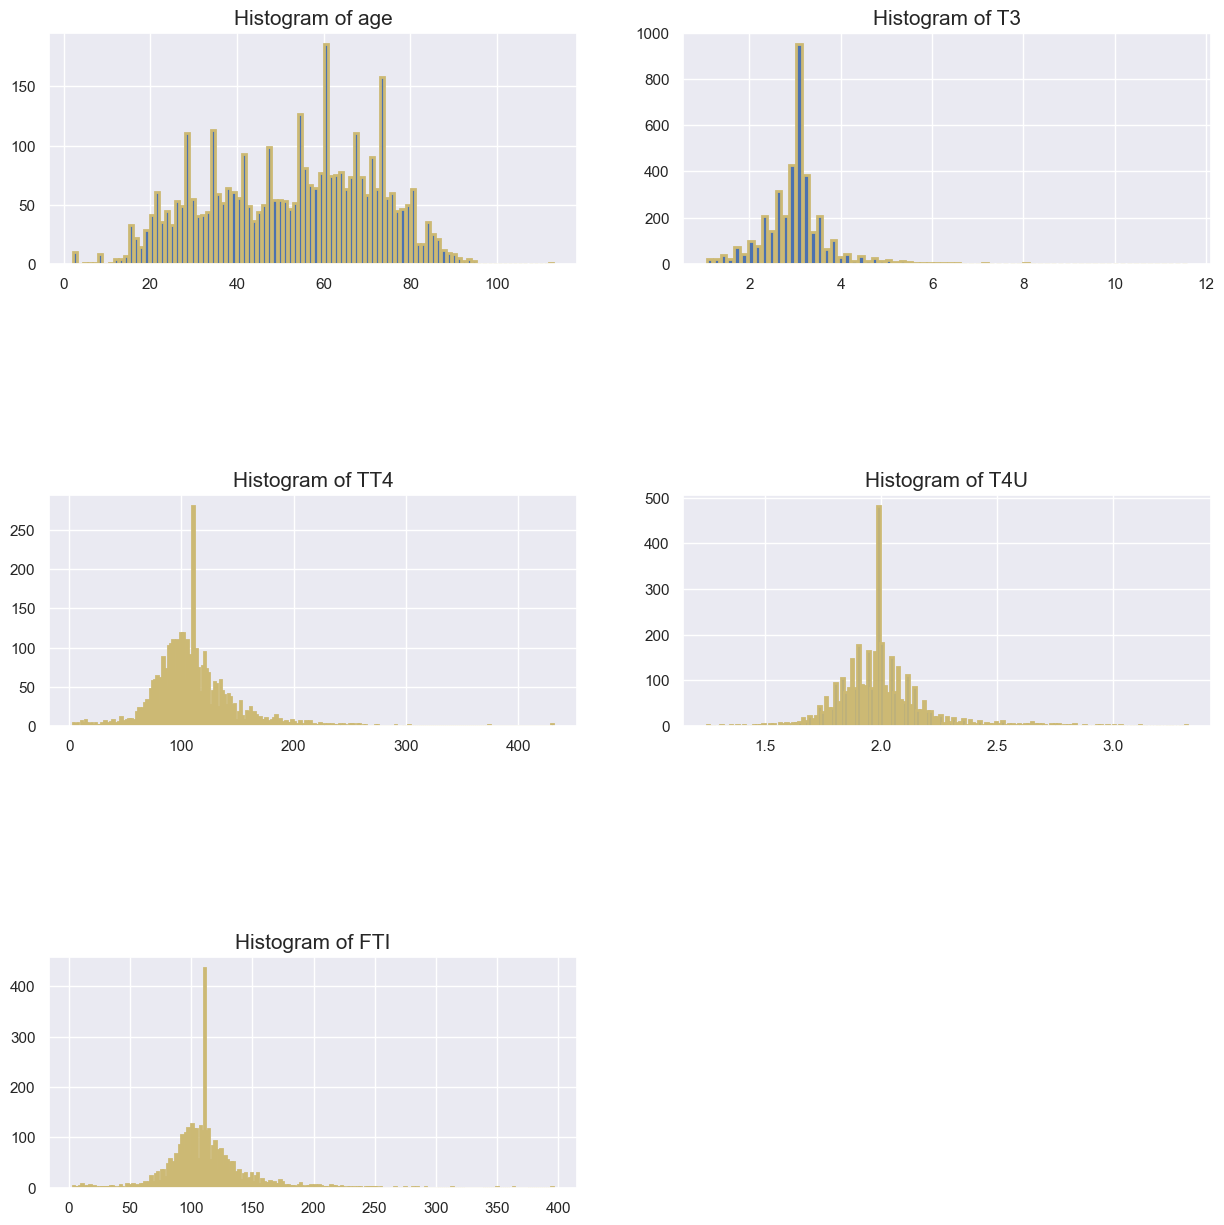

In [63]:
plt.figure(figsize=(15,15))
for i,j in enumerate(columns):
    plt.subplot(3,2,i+1)
    plt.title("Histogram of {}".format(j),fontsize=15)
    bins = len(df[j].unique())
    plt.hist(df[j],bins=bins,rwidth=0.8,edgecolor='y',linewidth=2,)
plt.subplots_adjust(hspace=1.0)

In [64]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

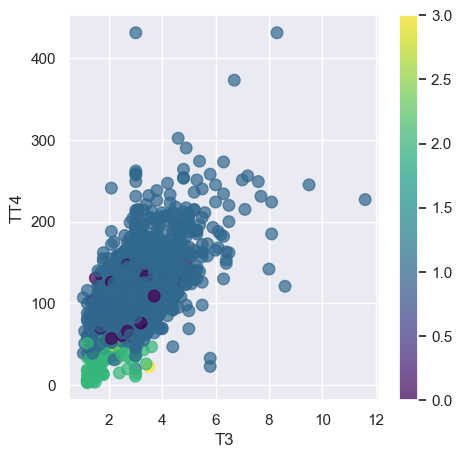

In [65]:
plt.figure(figsize=(5,5))
plt.scatter(df.T3,df.TT4,c=df.Class,s=70,alpha = 0.7,cmap = 'viridis');
plt.xlabel("T3")
plt.ylabel("TT4")
plt.colorbar();

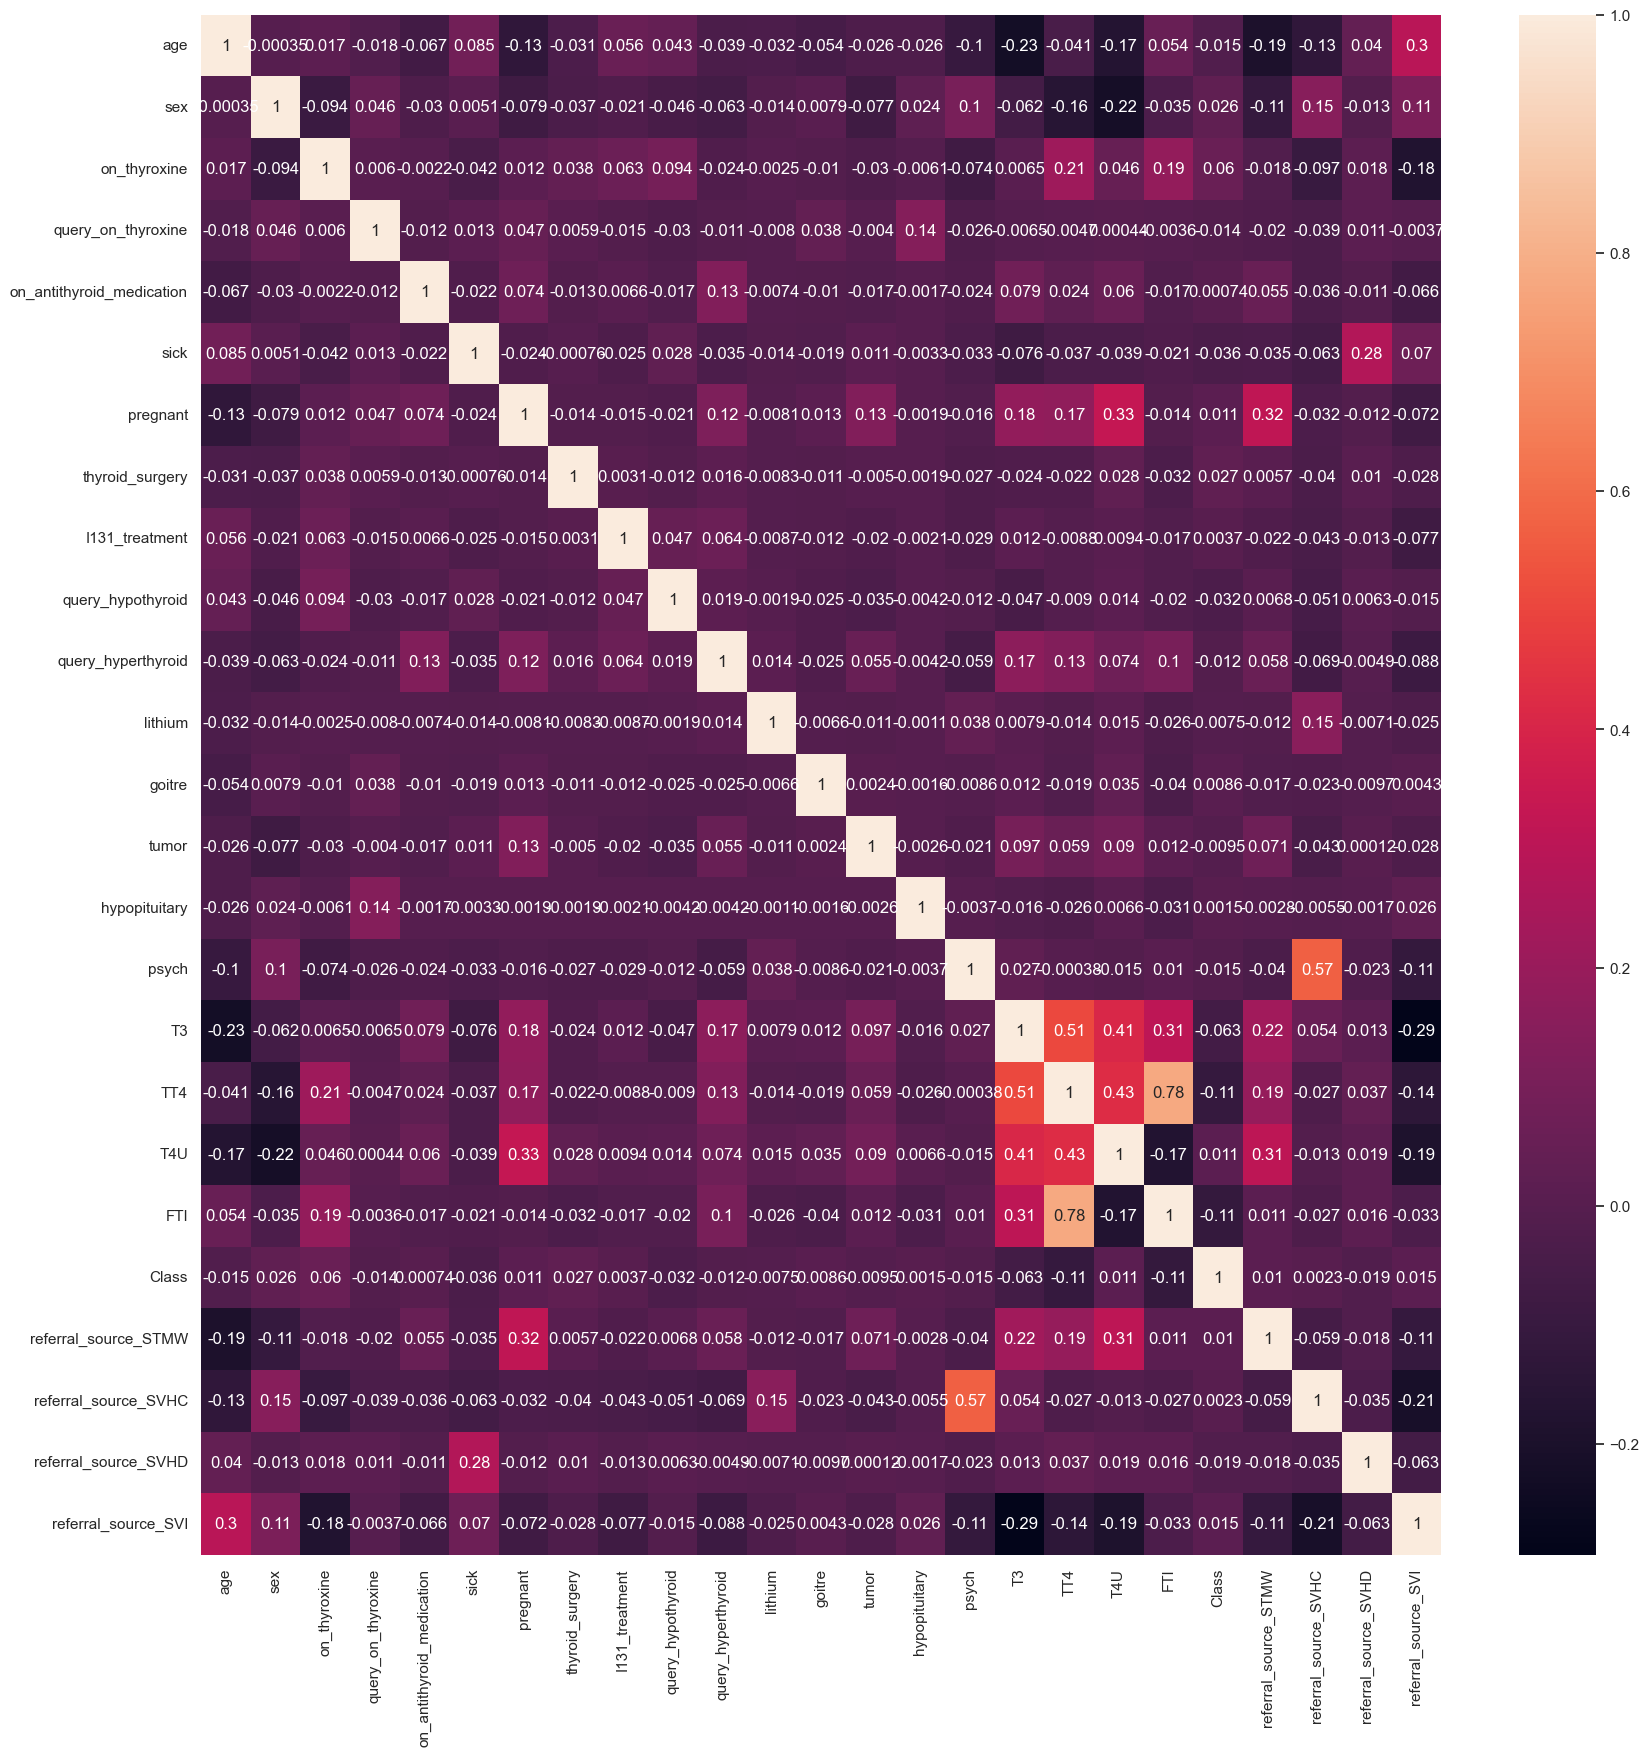

In [66]:
plt.figure(figsize = (20,20))
corr = df.iloc[:,:-1].corr()
top_features = corr.index
sns.heatmap(df[top_features].corr(),annot = True);
plt.savefig("corr.png")

In [67]:
thresold = 0.8

In [68]:
def correlation(dataset,thresold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thresold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [69]:
correlation(df.iloc[:,:-1],thresold)

set()

In [70]:
from sklearn.feature_selection import mutual_info_classif

In [71]:
mutual_info = mutual_info_classif(df.iloc[:,:-1],df['Class'])

In [72]:
mutual_data = pd.Series(mutual_info,index= df.iloc[:,:-1].columns)
mutual_data.sort_values(ascending=False)

Class                        0.323843
FTI                          0.110744
TT4                          0.092715
T3                           0.034435
age                          0.012689
T4U                          0.011651
on_thyroxine                 0.009615
referral_source_STMW         0.009438
query_hyperthyroid           0.009344
sex                          0.008939
referral_source_SVI          0.008671
thyroid_surgery              0.007909
referral_source_SVHC         0.005471
query_hypothyroid            0.004736
psych                        0.004637
referral_source_SVHD         0.003166
on_antithyroid_medication    0.001456
hypopituitary                0.001298
sick                         0.000999
lithium                      0.000000
tumor                        0.000000
I131_treatment               0.000000
pregnant                     0.000000
query_on_thyroxine           0.000000
goitre                       0.000000
dtype: float64

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df.iloc[:,:-1],df['Class'])

ExtraTreesClassifier()

In [74]:
print(model.feature_importances_)

[9.75551159e-03 4.19224610e-03 4.20651552e-03 6.27229954e-04
 1.43550369e-04 2.34649184e-03 3.82763840e-04 1.45553518e-03
 4.32366787e-04 5.39486436e-03 1.38713310e-03 1.80574869e-04
 4.36388600e-04 1.18927315e-03 4.71918636e-05 1.15842459e-03
 1.49638909e-02 5.03473676e-02 9.52469671e-03 4.96213298e-02
 8.36301853e-01 1.09644020e-03 2.03490642e-03 3.90166691e-04
 2.38328713e-03]


In [75]:
X = df.drop(columns='Class')

In [76]:
X.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI',
       'referral_source_STMW', 'referral_source_SVHC', 'referral_source_SVHD',
       'referral_source_SVI', 'referral_source_other'],
      dtype='object')

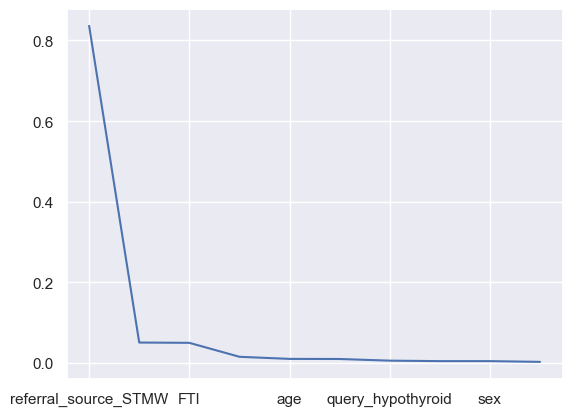

In [77]:
ranked_features = pd.Series(model.feature_importances_,index = X.columns)
ranked_features.nlargest(10).plot()
plt.show()

In [78]:
important_feature = ranked_features.sort_values(ascending=False).head(15).index
important_feature

Index(['referral_source_STMW', 'TT4', 'FTI', 'T3', 'age', 'T4U',
       'query_hypothyroid', 'on_thyroxine', 'sex', 'referral_source_other',
       'sick', 'referral_source_SVHD', 'thyroid_surgery', 'query_hyperthyroid',
       'tumor'],
      dtype='object')

In [79]:
X = df[['TT4', 'FTI', 'T3',  'T4U','age', 'sex']]
y = df['Class']

In [80]:
print(f'Independent Feature {X.shape}')
print(f'Dependent Feature {y.shape}')

Independent Feature (3772, 6)
Dependent Feature (3772,)


In [81]:
X

,TT4,FTI,T3,T4U,age,sex
0,126.000000,110.000000,3.5000,2.140,42.0,0
1,103.000000,111.469649,3.0000,1.995,24.0,0
2,110.000000,121.000000,3.0135,1.910,47.0,1
3,176.000000,111.469649,2.9000,1.995,71.0,0
4,62.000000,71.000000,2.2000,1.870,71.0,0
...,...,...,...,...,...,...
3767,109.319345,111.469649,3.0135,1.995,31.0,0
3768,125.000000,115.000000,3.1000,2.080,69.0,0
3769,113.000000,106.000000,2.8000,2.070,75.0,0
3770,83.000000,88.000000,3.0000,1.940,73.0,1


In [82]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3767    1
3768    1
3769    1
3770    1
3771    1
Name: Class, Length: 3772, dtype: int32

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [84]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)

print(f'Train Accuracy : {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy : {accuracy_score(y_test,y_test_pred)}')
print(confusion_matrix(y_test,y_test_pred))

print(classification_report(y_test,y_test_pred))

Train Accuracy : 0.9996212121212121
Test Accuracy : 0.9408127208480566
[[   3   53    0]
 [   4 1038    5]
 [   0    5   24]]
              precision    recall  f1-score   support

           0       0.43      0.05      0.10        56
           1       0.95      0.99      0.97      1047
           2       0.83      0.83      0.83        29

    accuracy                           0.94      1132
   macro avg       0.73      0.62      0.63      1132
weighted avg       0.92      0.94      0.92      1132



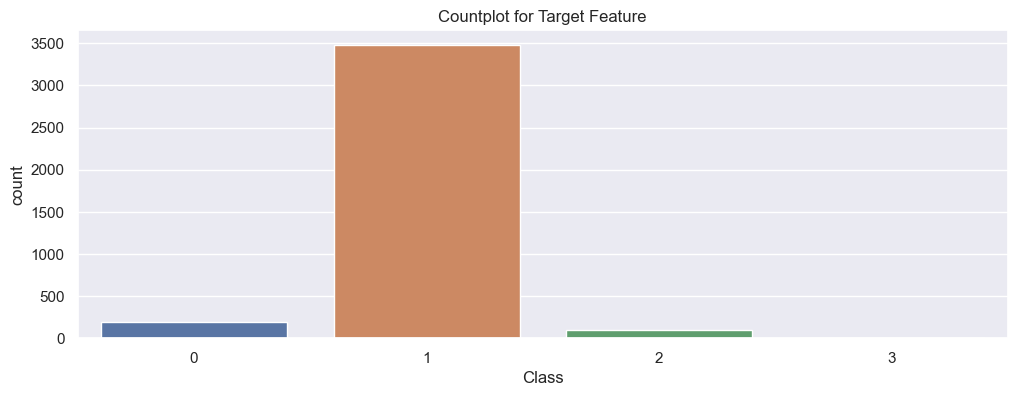

In [86]:
plt.figure(figsize=(12,4))
sns.countplot(x='Class',data=df)
plt.title("Countplot for Target Feature");

In [87]:
ros = RandomOverSampler()
X_sampled,y_sampled  = ros.fit_resample(X,y)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


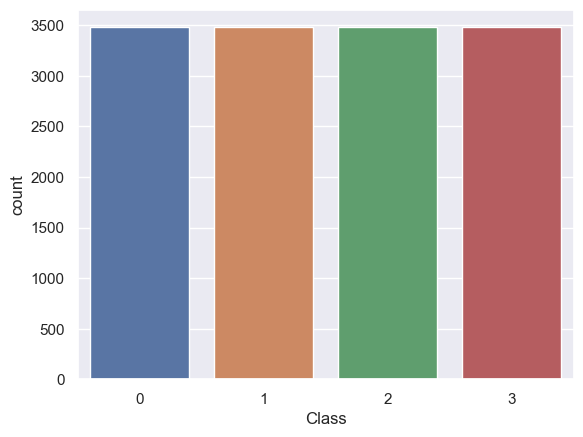

In [88]:
sns.countplot(y_sampled);


In [89]:
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.3)

In [90]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)


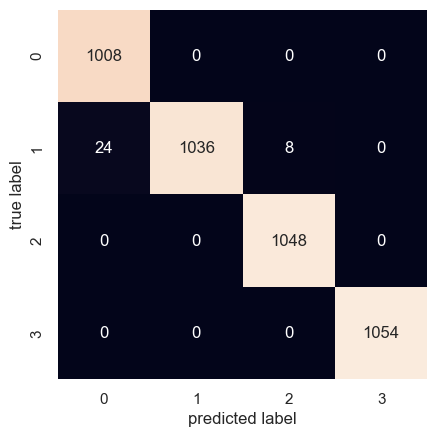

In [92]:
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label');
plt.ylabel('true label');

In [93]:
model_train_accuracy = accuracy_score(y_train,y_train_pred)
model_train_precision = precision_score(y_train,y_train_pred,average="weighted")
model_train_recall = recall_score(y_train,y_train_pred,average="weighted")
model_train_f1 = f1_score(y_train,y_train_pred,average="weighted")
train_report=classification_report(y_train,y_train_pred)

model_test_accuracy = accuracy_score(y_test,y_test_pred)
model_test_precision = precision_score(y_test,y_test_pred,average="weighted")
model_test_recall = recall_score(y_test,y_test_pred,average="weighted")
model_test_f1 = f1_score(y_test,y_test_pred,average="weighted")

test_report=classification_report(y_test,y_test_pred)



print("Performance Of Trained Data\n")
print(f"Tained Accuracy:{model_train_accuracy}\n")

print(f"MOdel Trained Precison:{model_train_precision}")
print(f"Tained Model Recall:{model_train_recall}")
print(f"Tained Model F1 Score:{model_train_f1}")
print(f"Trained Model Classification Report:\n{train_report}\n")
print("--*--"*20)
print("\nPerformance Of Test Data\n")
print(f"Test Accuracy:{model_test_accuracy}\n")
print(f"MOdel Test Precison:{model_test_precision}")
print(f"Test Model Recall:{model_test_recall}")
print(f"Test Model F1 Score:{model_test_f1}")
print(f"Test Model Classification Report:\n{test_report}\n")





Performance Of Trained Data

Tained Accuracy:1.0

MOdel Trained Precison:1.0
Tained Model Recall:1.0
Tained Model F1 Score:1.0
Trained Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2473
           1       1.00      1.00      1.00      2413
           2       1.00      1.00      1.00      2433
           3       1.00      1.00      1.00      2427

    accuracy                           1.00      9746
   macro avg       1.00      1.00      1.00      9746
weighted avg       1.00      1.00      1.00      9746


--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--

Performance Of Test Data

Test Accuracy:0.9923408329344183

MOdel Test Precison:0.9924889290558855
Test Model Recall:0.9923408329344183
Test Model F1 Score:0.9923200190494157
Test Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00 

# HyperTunning


In [94]:
random_grid = {
    "max_depth":[5,8,15,None,10],
    
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,100]
}
print(random_grid)

{'max_depth': [5, 8, 15, None, 10], 'min_samples_split': [2, 8, 15, 20], 'n_estimators': [100, 200, 500, 100]}


In [95]:
random = RandomizedSearchCV(estimator=RandomForestClassifier(criterion='entropy'),cv=5,param_distributions=random_grid)
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 100]})

In [96]:
random.best_params_

{'n_estimators': 500, 'min_samples_split': 8, 'max_depth': None}

In [97]:
best_rfc = random.best_estimator_

In [98]:
y_pred = best_rfc.predict(X_test)
y_train_pred = best_rfc.predict(X_train)


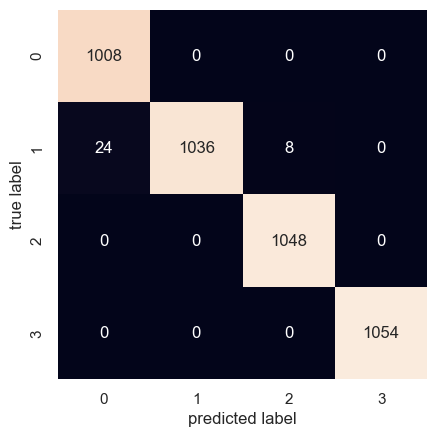

In [99]:
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('predicted label');
plt.ylabel('true label');

In [100]:
model_train_accuracy = accuracy_score(y_train,y_train_pred)
model_train_precision = precision_score(y_train,y_train_pred,average="weighted")
model_train_recall = recall_score(y_train,y_train_pred,average="weighted")
model_train_f1 = f1_score(y_train,y_train_pred,average="weighted")
train_report=classification_report(y_train,y_train_pred)

model_test_accuracy = accuracy_score(y_test,y_test_pred)
model_test_precision = precision_score(y_test,y_test_pred,average="weighted")
model_test_recall = recall_score(y_test,y_test_pred,average="weighted")
model_test_f1 = f1_score(y_test,y_test_pred,average="weighted")

test_report=classification_report(y_test,y_test_pred)



print("Performance Of Trained Data\n")
print(f"Tained Accuracy:{model_train_accuracy}\n")

print(f"MOdel Trained Precison:{model_train_precision}")
print(f"Tained Model Recall:{model_train_recall}")
print(f"Tained Model F1 Score:{model_train_f1}")
print(f"Trained Model Classification Report:\n{train_report}\n")
print("--*--"*20)
print("\nPerformance Of Test Data\n")
print(f"Test Accuracy:{model_test_accuracy}\n")
print(f"MOdel Test Precison:{model_test_precision}")
print(f"Test Model Recall:{model_test_recall}")
print(f"Test Model F1 Score:{model_test_f1}")
print(f"Test Model Classification Report:\n{test_report}\n")





Performance Of Trained Data

Tained Accuracy:1.0

MOdel Trained Precison:1.0
Tained Model Recall:1.0
Tained Model F1 Score:1.0
Trained Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2473
           1       1.00      1.00      1.00      2413
           2       1.00      1.00      1.00      2433
           3       1.00      1.00      1.00      2427

    accuracy                           1.00      9746
   macro avg       1.00      1.00      1.00      9746
weighted avg       1.00      1.00      1.00      9746


--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--

Performance Of Test Data

Test Accuracy:0.9923408329344183

MOdel Test Precison:0.9924889290558855
Test Model Recall:0.9923408329344183
Test Model F1 Score:0.9923200190494157
Test Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00 

In [117]:
patient1 =[73,67,3.2,2.080,53,1]

In [118]:
pat = np.array([patient1])


In [119]:
pred=classifier.predict(pat)
pred

C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [105]:
X_test

,TT4,FTI,T3,T4U,age,sex
12091,49.000000,55.000000,2.2,1.890,47.0,0
7543,43.000000,40.000000,2.4,2.060,61.0,0
6834,73.000000,67.000000,3.2,2.080,53.0,1
798,103.000000,97.000000,3.4,2.060,36.0,1
12441,49.000000,55.000000,2.2,1.890,47.0,0
...,...,...,...,...,...,...
7600,38.000000,52.000000,1.5,1.720,47.0,0
413,87.000000,102.000000,2.8,1.860,53.0,1
5876,109.319345,111.469649,3.0,1.995,54.0,1
1571,95.000000,82.000000,3.4,2.170,35.0,1


In [106]:
y_test

12091    3
7543     2
6834     0
798      1
12441    3
        ..
7600     2
413      1
5876     0
1571     1
6695     0
Name: Class, Length: 4178, dtype: int32

In [120]:
X_test.shape

(4178, 6)

In [121]:
y_test.shape


(4178,)

In [122]:
import pickle

In [124]:
pickle.dump(best_rfc,open('rfcmodel.pkl','wb'))

In [126]:
pickle_model = pickle.load(open('rfcmodel.pkl','rb'))

In [127]:
pickle_model.predict(pat)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])